In [55]:
using DataFrames
using PyPlot
#using Gadfly

In [56]:
df_hotel=readtable("train_clean.csv")

,x,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,gross_bookings_usd,booking_bool
1,550,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,6618,3,4.0,0,4.13,4.78,25,118.94,0,13901,6,3,1,1,1,0,5592.09,0,0,NA,0
2,551,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,11747,4,4.5,0,4.03,5.34,12,113.86,0,13901,6,3,1,1,1,0,5592.33,0,0,NA,0
3,552,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,18311,4,4.0,0,3.93,5.44,14,129.1,0,13901,6,3,1,1,1,0,5592.6,0,0,NA,0
4,553,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,19599,3,4.0,0,4.16,5.03,26,94.54,0,13901,6,3,1,1,1,0,5591.92,0,0,NA,0
5,554,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,24002,4,4.5,0,4.16,5.6,3,185.02,0,13901,6,3,1,1,1,0,5592.13,0,0,NA,0
6,555,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,29732,3,3.5,0,2.83,4.69,31,59.98,0,13901,6,3,1,1,1,0,5593.31,0,0,NA,0
7,556,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,35796,3,3.5,0,2.64,5.0,27,97.59,0,13901,6,3,1,1,1,0,5590.9,0,0,NA,0
8,557,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,36148,3,3.5,0,4.06,4.84,34,74.21,0,13901,6,3,1,1,1,0,5592.39,0,0,NA,0
9,558,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,41784,4,3.0,1,2.3,5.15,22,142.32,0,13901,6,3,1,1,1,0,5591.13,0,0,NA,0
10,559,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,43781,4,3.5,1,3.99,5.21,6,109.79,0,13901,6,3,1,1,1,0,5592.02,0,0,NA,0


In [57]:
size(df_hotel)

(306727,29)

In [58]:
function summary_stats(arr::DataArray)
    clean_arr = dropna(arr)
    print("missing: $(mean(isna(arr)))%\n")
    print("maximum: $(maximum(clean_arr))\n")
    print("minimum: $(minimum(clean_arr))\n")
    print("median:  $(median(clean_arr))\n")
    print("mean:    $(mean(clean_arr))\n")
    print("std:     $(std(clean_arr))\n")
end

summary_stats (generic function with 1 method)

In [59]:
summary_stats(df_hotel[:gross_bookings_usd])

missing: 0.9641603119386295%
maximum: 11056.72
minimum: 0.0
median:  222.4
mean:    394.88273537705817
std:     563.4559237365581


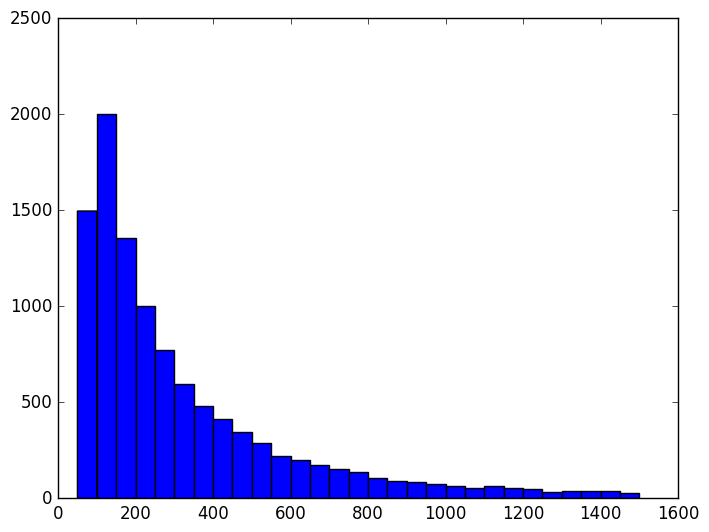

([1497.0,2004.0,1358.0,1002.0,775.0,594.0,480.0,412.0,348.0,290.0  …  63.0,55.0,64.0,57.0,47.0,33.0,40.0,38.0,37.0,26.0],[50,100,150,200,250,300,350,400,450,500  …  1050,1100,1150,1200,1250,1300,1350,1400,1450,1500],Any[PyObject <matplotlib.patches.Rectangle object at 0x35744ef28>,PyObject <matplotlib.patches.Rectangle object at 0x3485dfe10>,PyObject <matplotlib.patches.Rectangle object at 0x348187e10>,PyObject <matplotlib.patches.Rectangle object at 0x34cad3a90>,PyObject <matplotlib.patches.Rectangle object at 0x3455aec50>,PyObject <matplotlib.patches.Rectangle object at 0x3455b4668>,PyObject <matplotlib.patches.Rectangle object at 0x34cb53c50>,PyObject <matplotlib.patches.Rectangle object at 0x345343828>,PyObject <matplotlib.patches.Rectangle object at 0x3454b8f60>,PyObject <matplotlib.patches.Rectangle object at 0x3456071d0>  …  PyObject <matplotlib.patches.Rectangle object at 0x34549b8d0>,PyObject <matplotlib.patches.Rectangle object at 0x34cc50710>,PyObject <matplotlib.patches.Rec

In [60]:
PyPlot.plt[:hist](dropna(df_hotel[:gross_bookings_usd]),bins=[i*50 for i=1:30])

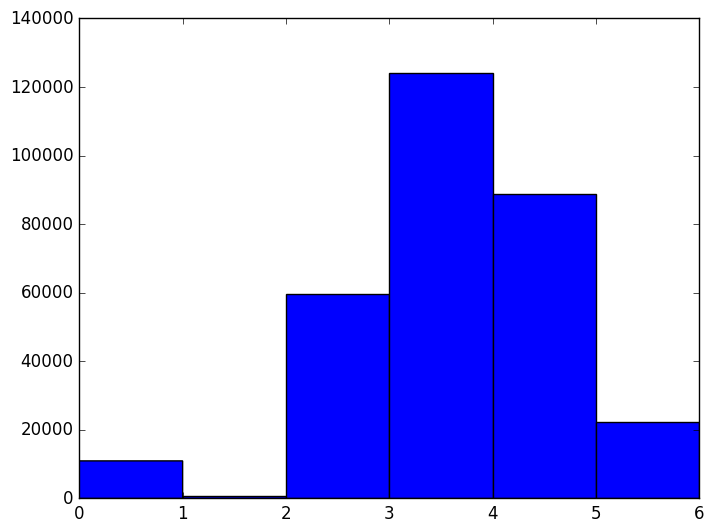

([10956.0,853.0,59748.0,124037.0,88698.0,22435.0],[0,1,2,3,4,5,6],Any[PyObject <matplotlib.patches.Rectangle object at 0x34c3b8550>,PyObject <matplotlib.patches.Rectangle object at 0x344f445c0>,PyObject <matplotlib.patches.Rectangle object at 0x34c49d1d0>,PyObject <matplotlib.patches.Rectangle object at 0x344e54828>,PyObject <matplotlib.patches.Rectangle object at 0x344d8a710>,PyObject <matplotlib.patches.Rectangle object at 0x344cd4fd0>])

In [61]:
PyPlot.plt[:hist](df_hotel[:prop_starrating],bins=[0,1,2,3,4,5,6])

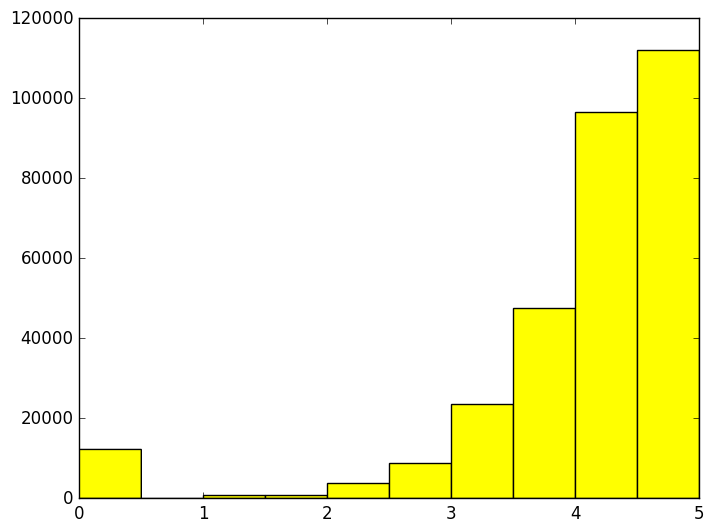

([12248.0,0.0,859.0,922.0,3882.0,8954.0,23644.0,47591.0,96579.0,112048.0],[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x343666278>,PyObject <matplotlib.patches.Rectangle object at 0x343666dd8>,PyObject <matplotlib.patches.Rectangle object at 0x34363ea20>,PyObject <matplotlib.patches.Rectangle object at 0x34363e0f0>,PyObject <matplotlib.patches.Rectangle object at 0x3435d55f8>,PyObject <matplotlib.patches.Rectangle object at 0x3435d5eb8>,PyObject <matplotlib.patches.Rectangle object at 0x343078240>,PyObject <matplotlib.patches.Rectangle object at 0x341278f98>,PyObject <matplotlib.patches.Rectangle object at 0x3434de860>,PyObject <matplotlib.patches.Rectangle object at 0x3435d29b0>])

In [64]:
PyPlot.plt[:hist](df_hotel[:prop_review_score],color="yellow")

In [10]:
orig_distance=df_hotel[:orig_destination_distance]

306727-element DataArrays.DataArray{Float64,1}:
 5592.09
 5592.33
 5592.6 
 5591.92
 5592.13
 5593.31
 5590.9 
 5592.39
 5591.13
 5592.02
 5591.25
 5591.99
 5592.41
    ⋮   
  707.63
  709.28
  709.51
  709.25
  709.72
  708.77
  714.47
  707.58
  709.33
  702.35
  708.67
  707.22

In [11]:
summary_stats(orig_distance)

missing: 0.0%
maximum: 11632.83
minimum: 0.01
median:  654.97
mean:    1712.6398543004038
std:     2390.6373149923947


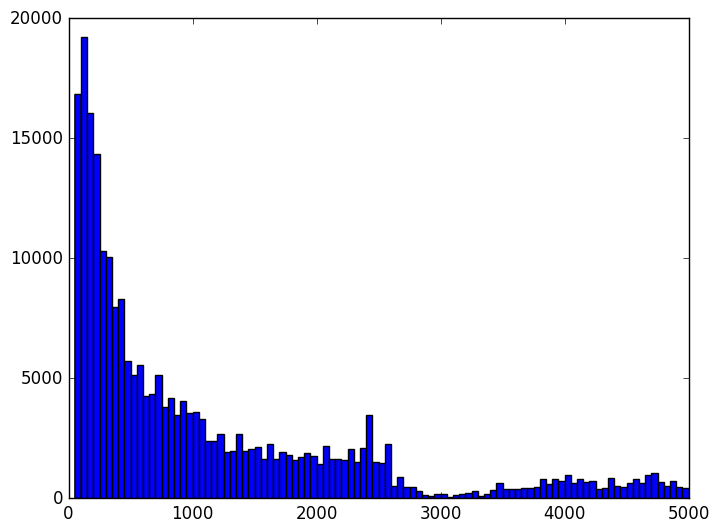

([16833.0,19231.0,16063.0,14356.0,10318.0,10040.0,7992.0,8316.0,5747.0,5133.0  …  644.0,819.0,625.0,972.0,1059.0,670.0,523.0,724.0,476.0,447.0],[50,100,150,200,250,300,350,400,450,500  …  4550,4600,4650,4700,4750,4800,4850,4900,4950,5000],Any[PyObject <matplotlib.patches.Rectangle object at 0x342e92b38>,PyObject <matplotlib.patches.Rectangle object at 0x344b35940>,PyObject <matplotlib.patches.Rectangle object at 0x3434d1320>,PyObject <matplotlib.patches.Rectangle object at 0x34306d6a0>,PyObject <matplotlib.patches.Rectangle object at 0x34306d9e8>,PyObject <matplotlib.patches.Rectangle object at 0x34434c7f0>,PyObject <matplotlib.patches.Rectangle object at 0x34434cc18>,PyObject <matplotlib.patches.Rectangle object at 0x3435cd5f8>,PyObject <matplotlib.patches.Rectangle object at 0x34d79fa20>,PyObject <matplotlib.patches.Rectangle object at 0x343308160>  …  PyObject <matplotlib.patches.Rectangle object at 0x362c4ddd8>,PyObject <matplotlib.patches.Rectangle object at 0x362c5ff60>,PyObject 

In [65]:
PyPlot.plt[:hist](df_hotel[:orig_destination_distance],bins=[i*50 for i=1:100])

In [13]:
df_book=df_hotel[df_hotel[:booking_bool].==1,:]

,x,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,gross_bookings_usd,booking_bool
1,568,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,77040,4,4.0,0,3.14,5.39,16,153.5,0,13901,6,3,1,1,1,0,5593.11,0,1,924.0,1
2,586,49,2013-02-07 18:40:10,16,31,2.5,270.08,31,13962,4,4.5,1,6.42,5.43,4,115.24,0,2799,1,5,2,0,1,0,144.11,0,1,128.48,1
3,1082,80,2013-01-03 10:58:19,5,219,2.5,122.34,219,107761,4,3.5,1,2.64,4.99,4,127.0,0,7274,2,24,1,0,1,0,386.87,0,1,324.08,1
4,1206,87,2013-05-15 18:22:23,16,31,3.74,210.6,31,33406,4,4.0,1,0.69,4.79,2,96.65,0,26262,1,3,1,0,1,1,166.25,0,1,96.9,1
5,3196,218,2013-03-14 00:42:18,32,55,5.0,185.91,129,19663,4,4.5,0,1.61,5.12,1,143.3,0,22417,1,0,1,1,2,0,528.35,1,1,141.69,1
6,3570,247,2013-02-11 15:37:28,5,219,2.57,122.51,219,19796,3,4.5,1,1.95,4.83,9,98.0,1,5837,1,2,1,1,1,0,160.19,0,1,110.2,1
7,3731,265,2013-01-23 18:27:52,5,219,2.3,74.79,219,24513,2,2.5,0,2.94,4.51,13,70.0,0,9402,1,14,4,0,2,0,9.56,0,1,158.48,1
8,4303,312,2013-05-06 10:13:48,5,219,3.24,127.82,219,49989,3,3.0,1,1.61,4.51,4,139.0,0,15893,1,2,1,0,1,0,1007.15,0,1,161.15,1
9,4820,353,2013-05-15 10:08:53,5,219,3.26,240.26,219,122526,3,4.5,1,2.4,4.83,14,170.0,0,10737,1,1,1,1,2,1,933.49,0,1,197.37,1
10,5365,387,2013-01-16 10:50:56,5,219,2.9,136.75,219,111152,4,4.5,0,0.69,5.04,10,299.0,0,3836,2,13,1,1,1,0,1202.5,0,1,680.24,1


In [14]:
summary_stats(df_book[:price_usd])

missing: 0.0%
maximum: 1550.0
minimum: 9.34
median:  116.0
mean:    136.41450832347857
std:     81.48373348296192


In [15]:
summary_stats(df_book[:prop_starrating])

missing: 0.0%
maximum: 5
minimum: 0
median:  3.0
mean:    3.306467752205949
std:     0.934368746678073


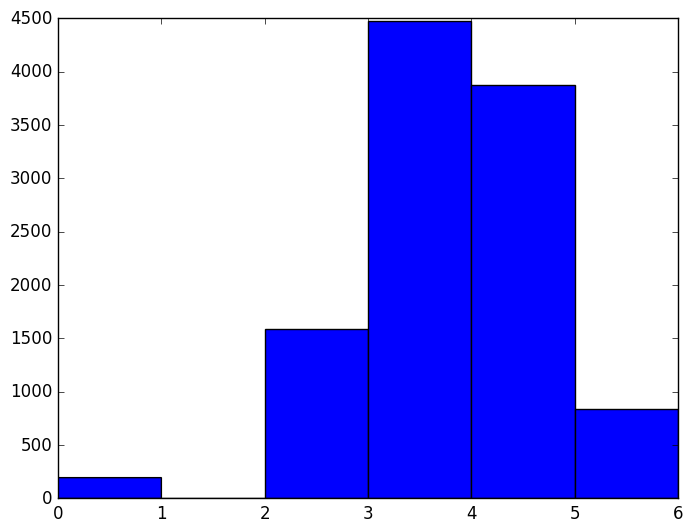

([195.0,8.0,1593.0,4477.0,3877.0,843.0],[0,1,2,3,4,5,6],Any[PyObject <matplotlib.patches.Rectangle object at 0x342db2940>,PyObject <matplotlib.patches.Rectangle object at 0x342db7128>,PyObject <matplotlib.patches.Rectangle object at 0x342db7a20>,PyObject <matplotlib.patches.Rectangle object at 0x342dbb2e8>,PyObject <matplotlib.patches.Rectangle object at 0x342dbbbe0>,PyObject <matplotlib.patches.Rectangle object at 0x342dc34a8>])

In [16]:
PyPlot.plt[:hist](df_book[:prop_starrating],bins=[0,1,2,3,4,5,6])

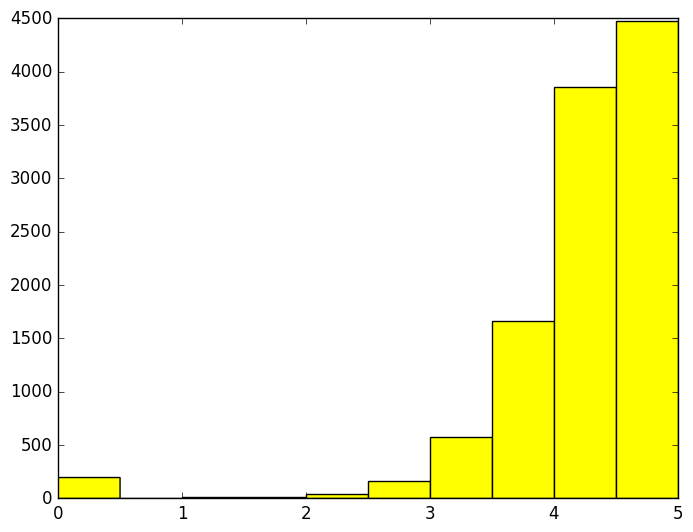

([196.0,0.0,9.0,9.0,39.0,165.0,578.0,1663.0,3857.0,4477.0],[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x342e662e8>,PyObject <matplotlib.patches.Rectangle object at 0x342e66ac8>,PyObject <matplotlib.patches.Rectangle object at 0x342e70390>,PyObject <matplotlib.patches.Rectangle object at 0x342e70c88>,PyObject <matplotlib.patches.Rectangle object at 0x342e74550>,PyObject <matplotlib.patches.Rectangle object at 0x342e74e48>,PyObject <matplotlib.patches.Rectangle object at 0x342e79748>,PyObject <matplotlib.patches.Rectangle object at 0x342e79ef0>,PyObject <matplotlib.patches.Rectangle object at 0x342e80908>,PyObject <matplotlib.patches.Rectangle object at 0x342e861d0>])

In [17]:
plt[:hist](df_book[:prop_review_score],color="yellow")

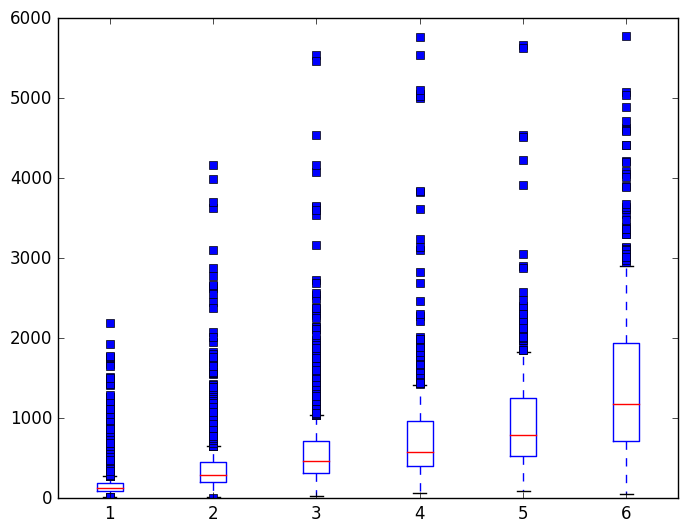

(0,6000)

In [18]:
numstayarr=Array(Any,6)


numstayarr[1]=df_book[df_book[:srch_length_of_stay].==1,:][:gross_bookings_usd]
numstayarr[2]=df_book[df_book[:srch_length_of_stay].==2,:][:gross_bookings_usd]
numstayarr[3]=df_book[df_book[:srch_length_of_stay].==3,:][:gross_bookings_usd]
numstayarr[4]=df_book[df_book[:srch_length_of_stay].==4,:][:gross_bookings_usd]
numstayarr[5]=df_book[df_book[:srch_length_of_stay].==5,:][:gross_bookings_usd]
numstayarr[6]=df_book[df_book[:srch_length_of_stay].>=6,:][:gross_bookings_usd]
boxplot(numstayarr, # Each column/cell is one box
     # Notched center
    whis=0.8, # Whisker length as a percent of inner quartile range
    widths=0.25, # Width of boxes
vert=true, # Horizontal boxes
    sym="rs")
ylim(0,6000)

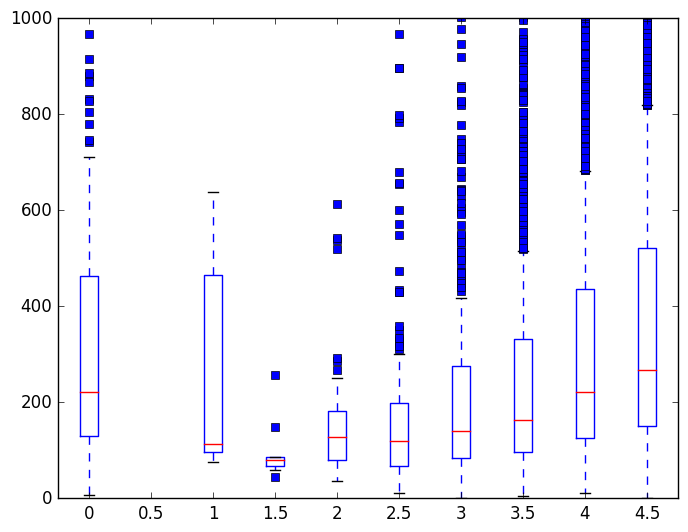

(0,1000)

In [19]:
numratearr=Array(Any,10)

numratearr[1]=df_book[df_book[:prop_review_score].==0,:][:gross_bookings_usd]
numratearr[2]=df_book[df_book[:prop_review_score].==0.5,:][:gross_bookings_usd]
numratearr[3]=df_book[df_book[:prop_review_score].==1,:][:gross_bookings_usd]
numratearr[4]=df_book[df_book[:prop_review_score].==1.5,:][:gross_bookings_usd]
numratearr[5]=df_book[df_book[:prop_review_score].==2,:][:gross_bookings_usd]
numratearr[6]=df_book[df_book[:prop_review_score].==2.5,:][:gross_bookings_usd]
numratearr[7]=df_book[df_book[:prop_review_score].==3,:][:gross_bookings_usd]
numratearr[8]=df_book[df_book[:prop_review_score].==3.5,:][:gross_bookings_usd]
numratearr[9]=df_book[df_book[:prop_review_score].==4,:][:gross_bookings_usd]
numratearr[10]=df_book[df_book[:prop_review_score].==4.5,:][:gross_bookings_usd]
boxplot(numratearr, # Each column/cell is one box
     # Notched center
    whis=0.8, # Whisker length as a percent of inner quartile range
    widths=0.3, # Width of boxes
 # Horizontal boxes
    sym="rs")
xticks([1,2,3,4,5,6,7,8,9,10],["0","0.5","1","1.5","2","2.5","3","3.5","4","4.5"])
ylim([0,1000])



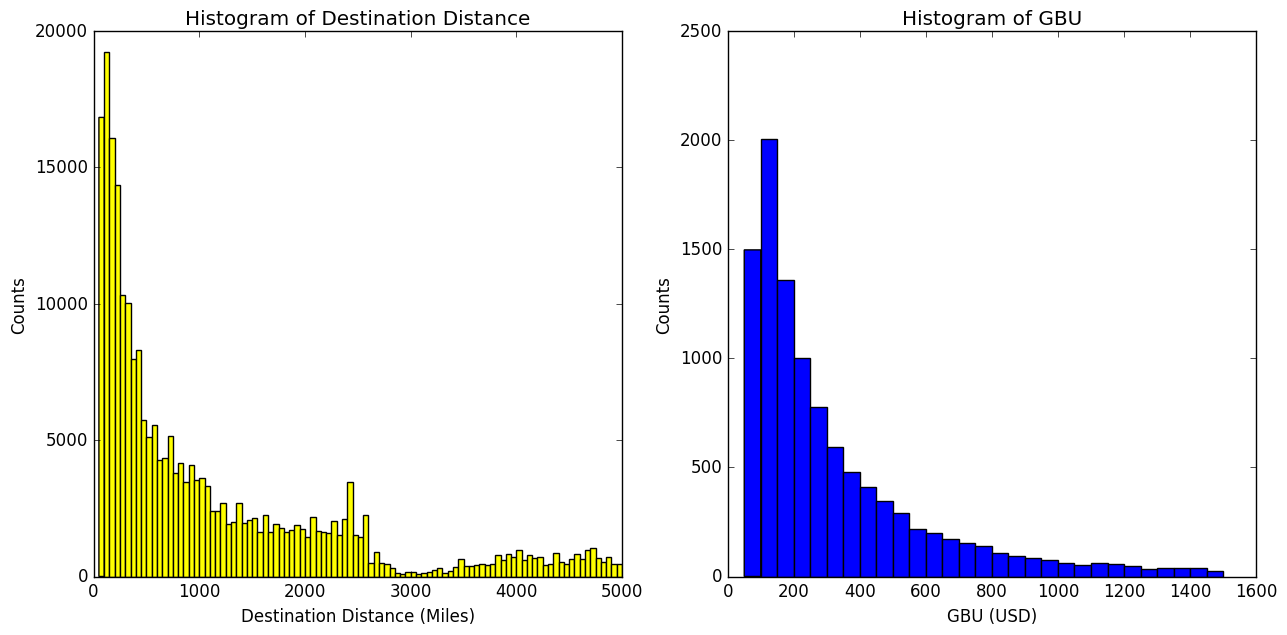

PyObject <matplotlib.text.Text object at 0x37b8fbda0>

In [73]:
fig = figure("pyplot_scatterplot1",figsize=(15,15))
ax = axes()
plt.subplot(221)
PyPlot.plt[:hist](df_hotel[:orig_destination_distance],bins=[i*50 for i=1:100],color="yellow")
xlabel("Destination Distance (Miles)") 
ylabel("Counts")
plt.title("Histogram of Destination Distance")

plt.subplot(222)
PyPlot.plt[:hist](dropna(df_hotel[:gross_bookings_usd]),bins=[i*50 for i=1:30])
title("Histogram of GBU")
xlabel("GBU (USD)")
ylabel("Counts")


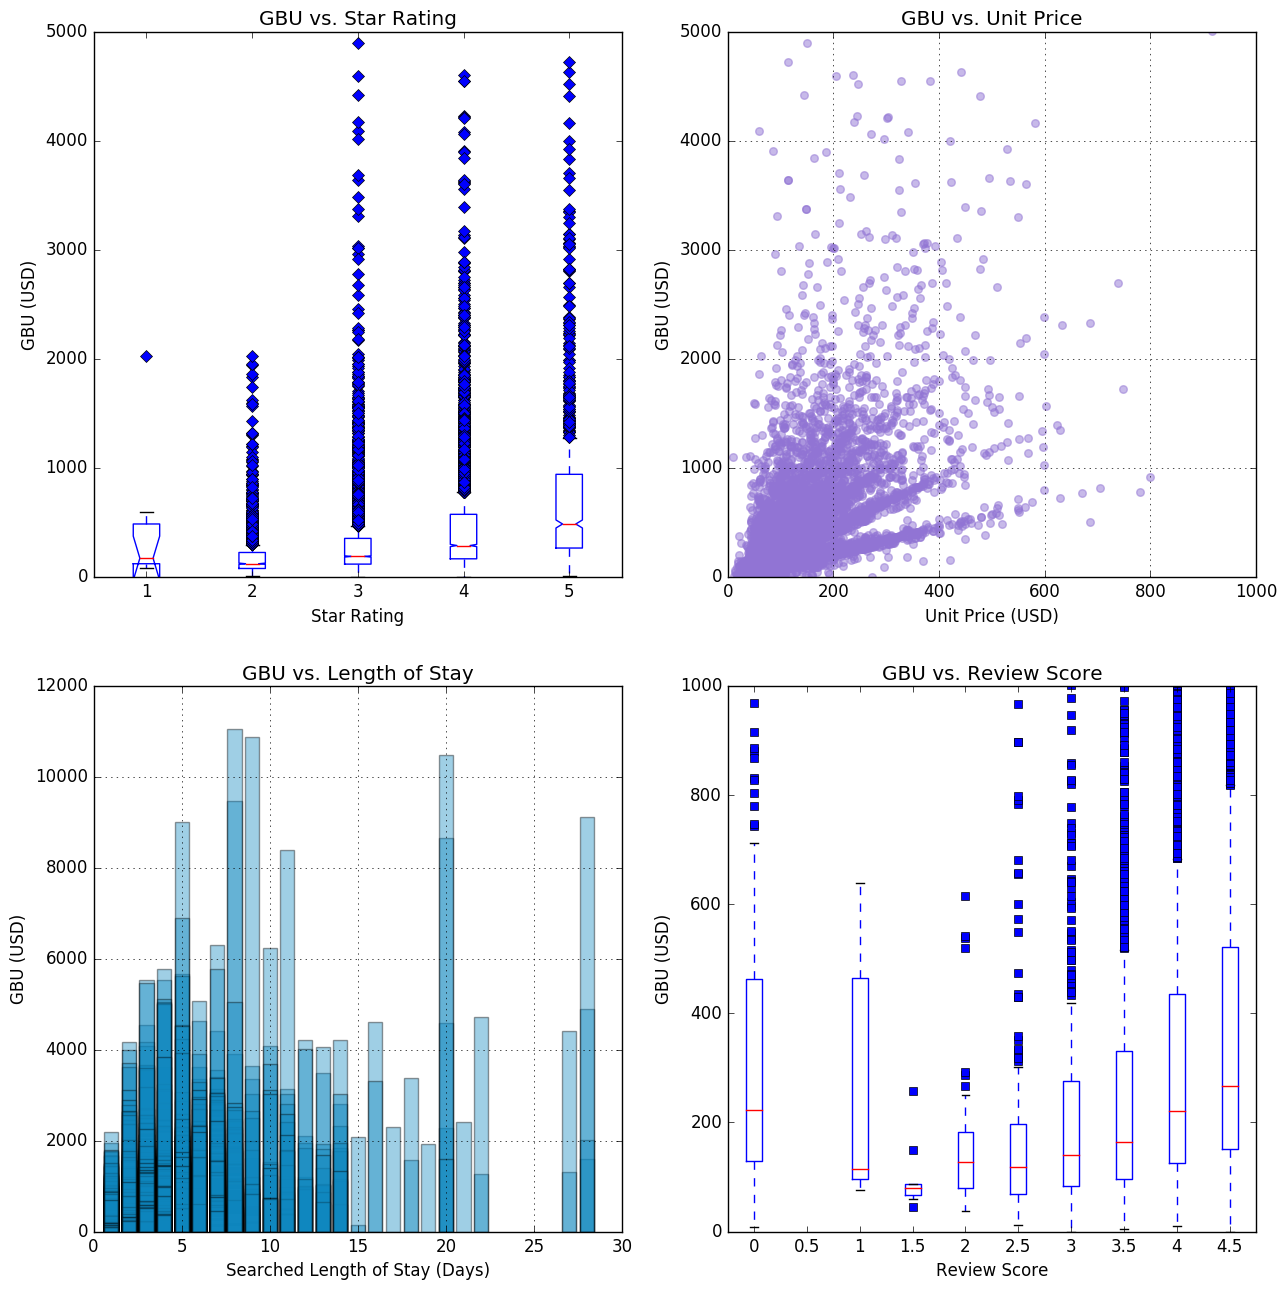

PyObject <matplotlib.text.Text object at 0x38eb8dcf8>

In [75]:
pplt = PyPlot

gbu_not_na = df_hotel[!isna(df_hotel[:gross_bookings_usd]),:];
gbu = gbu_not_na[:gross_bookings_usd];
price_u = gbu_not_na[:price_usd];
prop_s = gbu_not_na[:prop_starrating];
srch_los = gbu_not_na[:srch_length_of_stay];
srch_rc = gbu_not_na[:srch_room_count];

bgbu = Array(Any,5)

bgbu[1] = gbu[gbu_not_na[:prop_starrating].==1]
bgbu[2] = gbu[gbu_not_na[:prop_starrating].==2]
bgbu[3] = gbu[gbu_not_na[:prop_starrating].==3]
bgbu[4] = gbu[gbu_not_na[:prop_starrating].==4]
bgbu[5] = gbu[gbu_not_na[:prop_starrating].==5]

bgbu[1] = bgbu[1][bgbu[1].<5000]
bgbu[2] = bgbu[2][bgbu[2].<5000]
bgbu[3] = bgbu[3][bgbu[3].<5000]
bgbu[4] = bgbu[4][bgbu[4].<5000]
bgbu[5] = bgbu[5][bgbu[5].<5000]

fig = figure("pyplot_scatterplot",figsize=(15,15))
ax = axes()
pplt.subplot(221)
pplt.title("GBU vs. Star Rating")
xlabel("Star Rating")
ylabel("GBU (USD)")
ylim([0,5000])
#plot(prop_s, gbu, "r+", label="gbu")
boxplot(bgbu, # Each column/cell is one box
	notch=true, # Notched center
	whis=0.5, # Whisker length as a percent of inner quartile range
	widths=0.25, # Width of boxes
    vert=true, # Horizontal boxes
	sym="bD") # Symbol color and shape (rs = red square)

pplt.subplot(222)
pplt.title("GBU vs. Unit Price")
scatter(price_u,gbu,s=30,alpha=0.5,color="#9174D4")
grid("on")
xlim([0,1000])
ylim([0,5000])
xlabel("Unit Price (USD)")
ylabel("GBU (USD)")

pplt.subplot(223)
pplt.title("GBU vs. Length of Stay")
grid("on")
b = bar(srch_los,gbu,color="#0f87bf",align="center",alpha=0.4)
xlabel("Searched Length of Stay (Days)") 
ylabel("GBU (USD)")


pplt.subplot(224)
boxplot(numratearr, # Each column/cell is one box
     # Notched center
    whis=0.8, # Whisker length as a percent of inner quartile range
    widths=0.3, # Width of boxes
 # Horizontal boxes
    sym="rs")
xticks([1,2,3,4,5,6,7,8,9,10],["0","0.5","1","1.5","2","2.5","3","3.5","4","4.5"])
ylim([0,1000])
xlabel("Review Score") 
ylabel("GBU (USD)")
plt.title("GBU vs. Review Score")


In [20]:
n=size(df_book)[1]

10993

In [21]:
pricedata=df_book[:price_usd].data
numday=df_book[:srch_length_of_stay].data
reviewrate=df_book[:prop_review_score].data
starrate=df_book[:prop_starrating].data
prombool=df_book[:promotion_flag].data
branbool=df_book[:prop_brand_bool].data
locascore=df_book[:prop_location_score1].data
numroom=df_book[:srch_room_count].data
distance=df_book[:orig_destination_distance].data
vis_price=df_book[:visitor_hist_adr_usd].data
book_wind=df_book[:srch_booking_window].data

10993-element Array{Int64,1}:
   3
   5
  24
   3
   0
   2
  14
   2
   1
  13
   1
 130
  10
   ⋮
   5
  59
  25
   8
 199
   1
   8
  17
   7
 165
 149
   1

In [22]:
X_1=[pricedata ones(n)]
y=df_book[:gross_bookings_usd].data
w=X_1\y

2-element Array{Float64,1}:
   3.40475
 -69.5752 

In [23]:
inc_mse=1/n*sum((y-X_1*w).^2)

240492.11218408597

In [24]:
X_2=[pricedata numday ones(n)]
w_2=X_2\y

3-element Array{Float64,1}:
    3.08395
  179.139  
 -398.253  

In [25]:
inc_mse_2=1/n*sum((y-X_2*w_2).^2)

134927.06073639446

In [26]:
X_3=[pricedata numday reviewrate ones(n)]
w_3=X_3\y

4-element Array{Float64,1}:
    3.09145
  179.086  
   -4.02184
 -383.111  

In [27]:
inc_mse_3=1/n*sum((y-X_3*w_3).^2)

134918.214676641

In [28]:
X_4=[pricedata numday reviewrate starrate ones(n)]
w_4=X_4\y

5-element Array{Float64,1}:
    3.0386 
  179.0    
   -6.32638
   10.8521 
 -402.408  

In [29]:
inc_mse_4=1/n*sum((y-X_4*w_4).^2)

134840.07201929722

In [30]:
X_5=[pricedata numday reviewrate starrate prombool ones(n)]
w_5=X_5\y

6-element Array{Float64,1}:
    3.05482
  178.409  
   -6.47132
    8.86848
   18.9601 
 -401.031  

In [31]:
inc_mse_5=1/n*sum((y-X_5*w_5).^2)

134776.413475128

In [32]:
X_6=[pricedata numday reviewrate starrate prombool branbool ones(n)]
w_6=X_6\y

7-element Array{Float64,1}:
    3.06341
  178.706  
   -8.26578
    9.43794
   22.073  
   23.6557 
 -415.59   

In [33]:
inc_mse_6=1/n*sum((y-X_6*w_6).^2)

134670.71006198105

In [34]:
X_7=[pricedata numday reviewrate starrate prombool branbool locascore ones(n)]
w_7=X_7\y

8-element Array{Float64,1}:
    3.03153
  178.184  
   -8.62505
    7.51329
   18.526  
   26.8711 
    7.25389
 -423.263  

In [35]:
inc_mse_7=1/n*sum((y-X_7*w_7).^2)

134578.0358004158

In [36]:
X_8=[pricedata numday numroom reviewrate starrate prombool branbool locascore ones(n)]
w_8=X_8\y

9-element Array{Float64,1}:
    3.03895
  177.209  
  239.621  
   -8.70104
    6.8992 
   20.4504 
    8.87318
    3.17567
 -687.805  

In [37]:
inc_mse_8=1/n*sum((y-X_8*w_8).^2)

113426.88792371213

In [38]:
X_9=[pricedata numday numroom distance reviewrate starrate prombool branbool locascore ones(n)]
w_9=X_9\y

10-element Array{Float64,1}:
    3.03052   
  176.641     
  239.152     
    0.00389547
   -8.71758   
    5.46129   
   20.3193    
   11.7786    
    2.3344    
 -686.441     

In [39]:
inc_mse_9=1/n*sum((y-X_9*w_9).^2)

113352.2640259284

In [40]:
X_10=[pricedata numday numroom distance vis_price reviewrate starrate prombool branbool locascore ones(n)]
w_10=X_10\y

11-element Array{Float64,1}:
    2.96344   
  176.612     
  239.077     
    0.00338497
    0.159115  
   -9.64041   
    3.55852   
   20.4171    
   12.5087    
    1.85337   
 -693.074     

In [41]:
inc_mse_10=1/n*sum((y-X_10*w_10).^2)

113109.49484795812

In [42]:
X_11=[pricedata numday numroom starrate prombool branbool locascore book_wind ones(n)]
w_11=X_11\y

9-element Array{Float64,1}:
    2.99392 
  176.363   
  238.964   
    5.45132 
   20.4888  
   12.9132  
    1.81987 
    0.458252
 -721.056   

In [43]:
inc_mse_11=1/n*sum((y-X_11*w_11).^2)

113026.89605248196

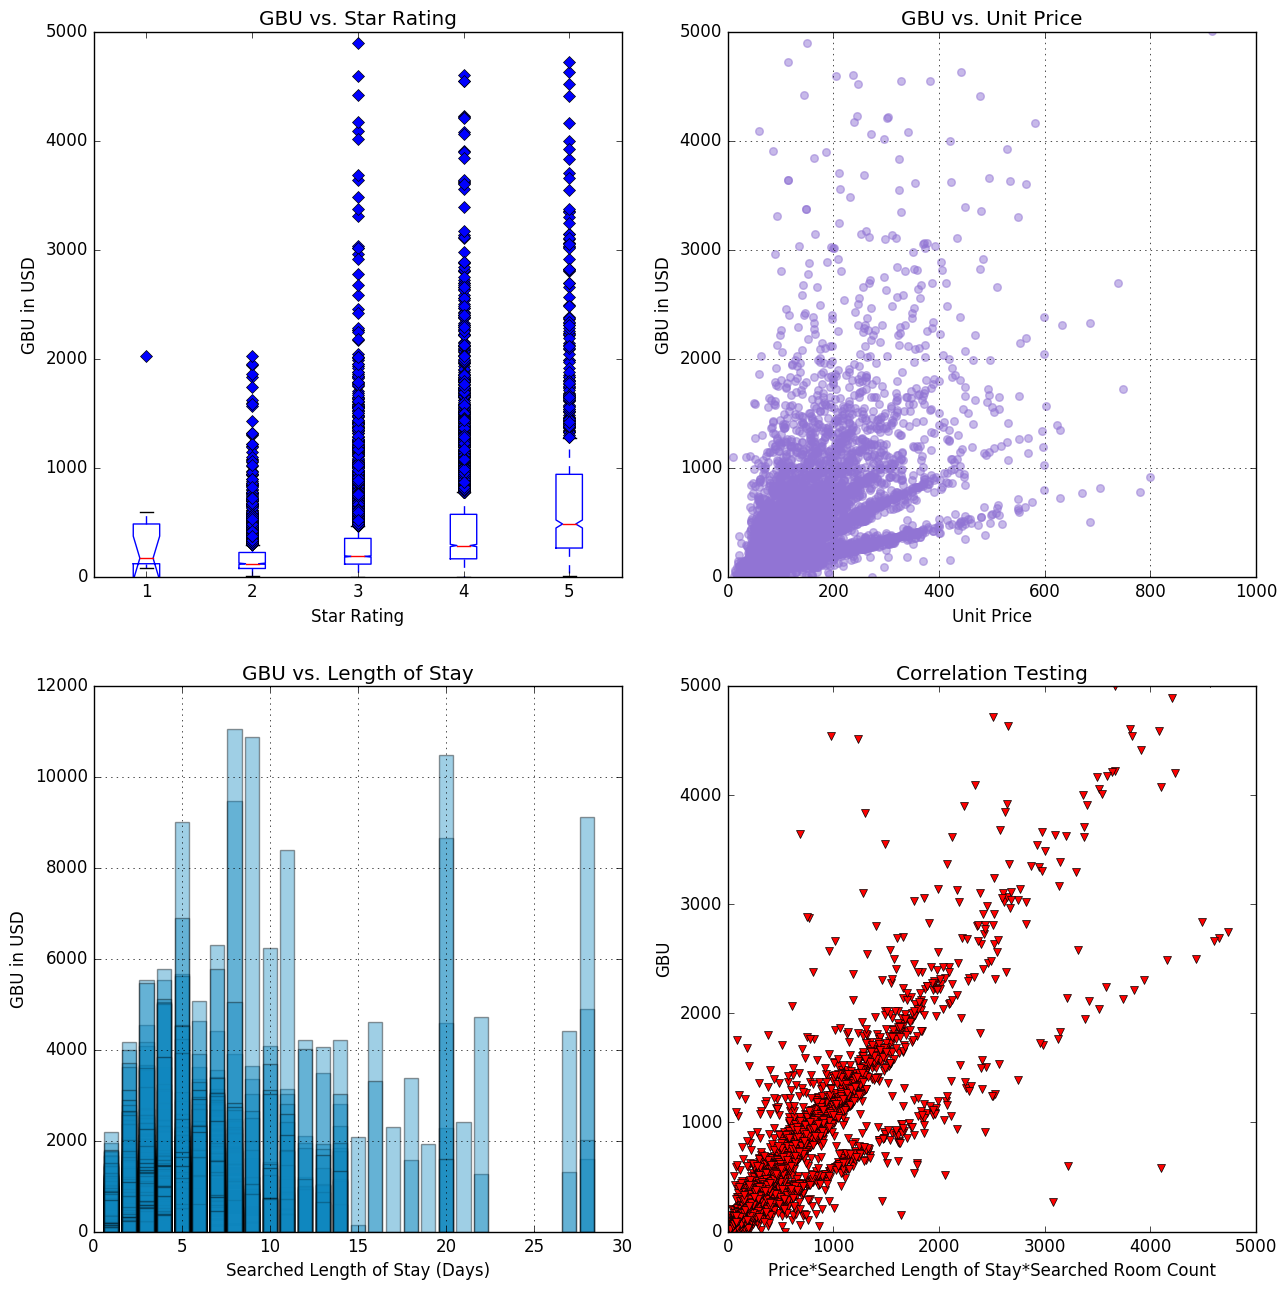

PyObject <matplotlib.text.Text object at 0x36aefa0b8>

In [46]:
fig = figure("pyplot_scatterplot",figsize=(5,5))
ax = axes()

plt[:hist](gbu, bins=[0, 100, 200, 300, 400, 500, 600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])

title("Histogram of GBU")
xlabel("GBU in USD")
ylabel("Counts")



  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/ZW/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/ZW/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/ZW/.julia/v0.5/IJulia/src/kerne

LoadError: LoadError: MethodError: no method matching getindex(::Module, ::Symbol)
while loading In[46], in expression starting on line 4